In [43]:
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

#ignore by message
warnings.filterwarnings("ignore")

import pandas as pd

df = pd.read_csv("violations.csv", low_memory=False)
df.head()



,case_no,ticket_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,CE642581,LDBQ6P16,2022-11-06 07:12:00,Open,3,100,Overfilling of barrel/dumpster,69,91,Dedham,...,09,C/O INQUILINOS BORICUAS en ACCION INC,405 SHAWMUT AVE,BOSTON,MA,02118,171538,42.342344,-71.073025,"(42.34234421065214, -71.07302539680293)"
1,CE642580,SUJ4EF16,2022-11-06 07:10:00,Open,1,25,Improper storage trash: res,13,55,Dedham,...,09,C/O INQUILINOS BORICUAS en ACCION INC,405 SHAWMUT AVE,BOSTON,MA,02118,171536,42.341796,-71.072347,"(42.34179606810341, -71.07234748696706)"
2,CE642579,QCX7KP17,2022-11-06 07:09:00,Open,1,25,Improper storage trash: res,191,195,Bowdoin,...,15,42 CHARLES ST SUITE E,NaN,DORCHESTER,MA,02122,421288,42.304896,-71.068515,"(42.30489621325078, -71.06851481425844)"
3,CE642579,QCX7KP17,2022-11-06 07:09:00,Open,3,100,Overfilling of barrel/dumpster,191,195,Bowdoin,...,15,42 CHARLES ST SUITE E,NaN,DORCHESTER,MA,02122,421288,42.304896,-71.068515,"(42.30489621325078, -71.06851481425844)"
4,CE642578,1HLJSU17,2022-11-06 06:49:00,Open,1,25,Improper storage trash: res,308,NaN,Centre,...,10,2533 N CARSON ST,,CARSON CITY,NV,89706,27966,42.322680,-71.103740,"(42.322679999538806, -71.10374000081457)"


In [44]:
print(df['contact_zip'].value_counts())


02128         30374
02116         26803
02124         25905
02127         21449
02114         20973
              ...  
02126-2732        1
02128-2517        1
98052             1
02861-3029        1
02135-2120        1
Name: contact_zip, Length: 10964, dtype: int64


In [46]:
df = df.fillna(0)
dist_9_zip = ["02134", "02135", "02467"]
df.contact_zip = df.contact_zip.astype(str)
df = df[df.contact_zip.isin(dist_9_zip)]
print(df.shape)
print(df['description'].value_counts())


(38444, 24)
Improper storage trash: res       22780
Overfilling of barrel/dumpster     5689
Overgrown Weeds On Property        2603
Failure clear sidewalk - snow      2486
Illegal dumping < 1 cubic yd       1382
Improper storage trash: com        1013
Occupying City prop wo permit       405
illegal parking prop owner 1        332
illegal parking prop owner 2        293
Unregistered motor vehicles- 2      160
Removal snow private prop           136
Illegal dumping 1-5 cubic yd.:      131
Failure to secure a Re-Inspect      128
Graffiti on building- 1              78
Failure clear sidewalk - snow:       73
Site Cleanliness license – WAR       69
Unregistered motor vehicles-1        69
Graffiti on building- 2              57
Failure To Register                  57
No Number On A Building              46
Fail to post management comp         42
Maint a dumpster wopermit            42
Removal snow non-res property        41
Failure of Delivery Standards        41
Shopping Cart - 2           

In [40]:
code_counts_table = df['code'].value_counts()
print(code_counts_table.to_markdown())

|     |   code |
|:----|-------:|
| 1   |  22780 |
| 3   |   5689 |
| 24  |   2603 |
| 17a |   2243 |
| 9a  |   1382 |
| 2   |   1013 |
| 21a |    332 |
| 27a |    305 |
| 21b |    293 |
| 17c |    243 |
| 22b |    160 |
| 15a |    136 |
| 9b  |    131 |
| 40  |    128 |
| 33a |     78 |
| 17b |     73 |
| 27c |     69 |
| 19a |     69 |
| 22a |     69 |
| 44  |     57 |
| 33b |     57 |
| 25  |     46 |
| 4   |     42 |
| 38  |     42 |
| 41  |     41 |
| 16b |     38 |
| 23b |     35 |
| 27b |     31 |
| 23a |     30 |
| 9c  |     29 |
| 19b |     27 |
| 8   |     26 |
| 12  |     22 |
| 11  |     21 |
| 18  |     17 |
| 7   |     17 |
| 15d |     12 |
| 15b |     12 |
| 26  |     10 |
| 20b |      9 |
| 10b |      4 |
| 16a |      3 |
| 20a |      3 |
| 10a |      3 |
| 14a |      2 |
| 5   |      2 |
| 39a |      2 |
| 15c |      2 |
| 29  |      2 |
| 13  |      1 |
| 39b |      1 |
| 6   |      1 |
| 46  |      1 |


In [41]:
landlord_viols = ["24", "40", "33a", "27c", "44", "33b", "25", "4", "38", "19b", "7", "14a", "13", "39b"] 
# not sure if illegal parking prop owner 1 and 2 refer to landlord
# also not sure which of these violations are actually landlord viols vs property viols 
df.code = df.code.astype(str)
df = df[df.code.isin(landlord_viols)]
df.head()

,case_no,ticket_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
89,CE642491,TPKA8X20,2022-11-04 05:36:00,Open,25,50,No Number On A Building,107,0,Chandler,...,04,36 OGDEN RD,0,CHESTNUT HILL,MA,02467,28624,42.346420,-71.073570,"(42.34642000036823, -71.07357000133574)"
191,CE642384,00DHLF08,2022-11-03 12:23:00,Open,24,15,Overgrown Weeds On Property,28,0,Hopedale,...,22,28 HOPEDALE ST,0,BRIGHTON,MA,02135,75214,42.360111,-71.126316,"(42.36011100013705, -71.12631600104035)"
775,CE641862,B2LVSZ06,2022-11-01 11:01:00,Open,24,15,Overgrown Weeds On Property,14,0,Reedsdale,...,21,1450 COMMONWEALTH AVE #A,0,BOSTON,MA,02135,115092,42.351790,-71.129300,"(42.351789999626135, -71.12930000098679)"
860,CE641794,ZAMJB806,2022-11-01 08:51:00,Open,24,15,Overgrown Weeds On Property,1330,1326,Commonwealth,...,21,1330 COMMONWEALTH AV,0,ALLSTON,MA,02134,37381,42.347910,-71.134990,"(42.34790999979612, -71.13499000157736)"
987,CE641671,X57E3S16,2022-10-31 14:09:00,Closed,4,300,Maint a dumpster wopermit,33,0,Wigglesworth,...,10,39 BRIGHTON AVE,0,BOSTON,MA,02134,149630,42.334728,-71.102477,"(42.33472800006078, -71.10247700111886)"


(605496, 24)


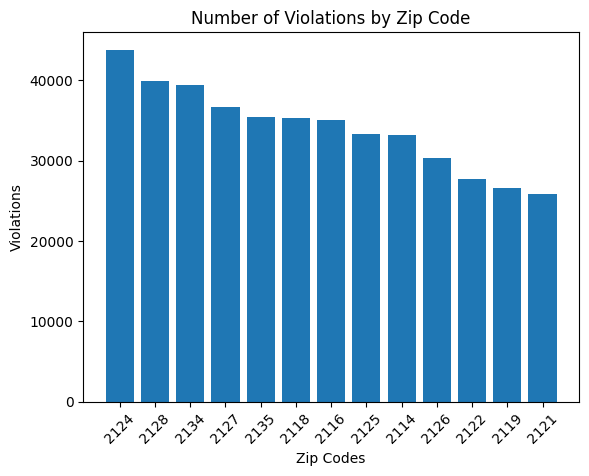

In [35]:
df['violation_zip'].value_counts()
print(df.shape)
zip = ['2124', '2128', '2134', '2127', '2135', '2118', '2116', '2125', '2114', '2126', '2122', '2119', '2121']
viol = [43777, 39860, 39462, 36653, 35395, 35326, 35021, 33308, 33182, 30351, 27669, 26553, 25848]
plt.bar(zip, viol)
plt.xlabel("Zip Codes")
plt.xticks(rotation=45)
plt.ylabel("Violations")
plt.title('Number of Violations by Zip Code')
plt.show()

ST      445369
AVE      86005
RD       36103
St        6234
PL        4244
TER       3631
SQ        3538
PARK      3097
CT        2150
HWY       2059
DR        1833
AV        1645
WAY       1277
Av         930
PKWY       736
BLVD       724
CIR        387
LN         298
           283
Pz         237
CIRT       158
PLZ        151
GRN        130
Pw         113
HW         112
Rd          91
Wy          55
PW          41
ROW         41
PK          35
Pl          26
Ct          25
TE          23
WY          18
AL          17
Pk          16
WHF         14
CI          12
Hw          11
Dr           5
Te           5
Sq           4
WH           4
PZ           3
MALL         2
CRES         2
Bl           2
ALY          1
BL           1
GDNS         1
Ci           1
Name: violation_suffix, dtype: int64
(605496, 24)


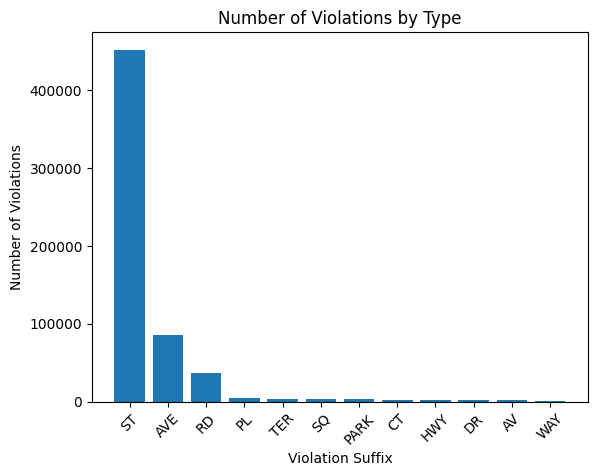

In [34]:
# df.groupby('violation_suffix').value_counts().loc['ST']

print(df['violation_suffix'].value_counts())
print(df.shape)
suffix = ['ST', 'AVE', 'RD', 'PL', 'TER', 'SQ', 'PARK', 'CT', 'HWY', 'DR', 'AV', 'WAY']
num = [451603, 86005, 36103, 4244, 3631, 3538, 3097, 2150, 2059, 1833, 1645, 1277]
plt.bar(suffix, num)
plt.xlabel("Violation Suffix")
plt.xticks(rotation=45)
plt.ylabel("Number of Violations")
plt.title('Number of Violations by Type')
plt.show()


In [14]:
import folium

bos_map = folium.Map(location=[42.361145, -71.057083])
bos_map.save("raw_map.html")
bos_map

In [28]:
vio_df = df[['latitude', 'longitude', 'violation_suffix', 'value']].where(df['violation_suffix'] == 'ST')
vio_df = vio_df.dropna()
vio_df

,latitude,longitude,violation_suffix,value
0,42.342344,-71.073025,ST,100.0
1,42.341796,-71.072347,ST,25.0
2,42.304896,-71.068515,ST,25.0
3,42.304896,-71.068515,ST,100.0
4,42.322680,-71.103740,ST,25.0
...,...,...,...,...
605490,42.339420,-71.077690,ST,25.0
605491,42.339550,-71.077850,ST,25.0
605492,42.339640,-71.078540,ST,25.0
605493,42.369110,-71.037040,ST,25.0


In [30]:
from folium.plugins import HeatMap

vio_df.apply(lambda x: folium.CircleMarker(
    location=[x.latitude, x.longitude], radius=3, 
        fill=True).add_to(bos_map), 
    axis=1
    )
bos_map

KeyboardInterrupt: 